<a href="https://colab.research.google.com/github/MaiteVillalon/ADA-informes/blob/main/Estadisticos_de_ordenamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Descripción del problema**


En **teoría de la computación** se tiene que una reducción es una **transformación de un problema a otro problema**, es decir, podemos solucionar un problema A con soluciones de un problema B.


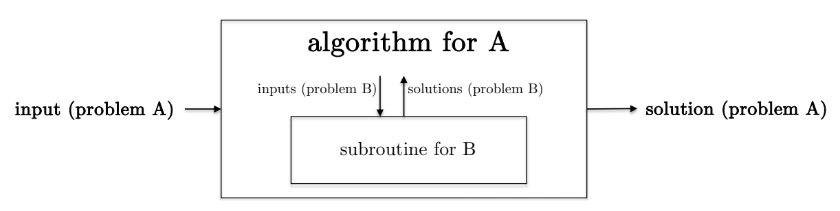

Tenemos un problema A que resolver, lo que se realiza es resolver un problema B y sus soluciones nos entregan las soluciones de nuestro problema principal A.

Al realizar este procedimiento, **el problema A se redujo al problema B** y por ende podemos decir con seguridad que el problema A no es más dificil que el problema B. 

El algortimo que estudiaremos en este informe es **Select**.

Select es un algoritmo que nos encuentra un estadistico deseado de cierto conjunto de numeros.

***¿Qué es un estadistico?***

El estadístico de orden kº es igual al k-ésimo valor más pequeño de una muestra estadística. Junto con los estadísticos de rango, los estadísticos de orden son una de las herramientas fundamentales de la estadística no paramétrica y de inferencia.


```
Entrada: El algortimo recibe un arreglo de n elementos [a1, a2, a3..., an] y un indice i.

Salida: Elemento x en A, que es mayor a exactamente i-1 elementos de A.
```



##**Descripción del Algoritmo**

Como mencionamos anteriormente, Select encontrara el iesimo elemento más pequeño de un conjunto. Para lograrlo Select hace uso de 3 funciones, pivotSelection, Partition e InsertionSort. Partition es parte del algoritmo de ordenamiento QuickSort, por ende podemos decir que Select se redujo a QuickSort, a continuacion veremos como funciona cada una de las funciones mencionadas.

***PivotSelection***

Esta función encuentra la mediana de un arreglo, esta mediana se usara como pivote de partition para realizar una partición más balanceada.

**Pasos**

  1. Divide el conjunto de n elementos en ⌈n/5⌉ grupos de 5 elementos cada uno (el último grupo queda con menos elementos)
  2. Encuentra la mediana de cada grupo aplicando el algoritmo InsertionSort para ordenarlos.
  3. Se aplica Pivot-selection recursivamente para encontrar la mediana m de las ⌈n/5⌉ medianas identificadas el paso previo.
  4. Luego, m será el pivote usado por el método Partition.

Gracias a esta selección del pivote, el método Select logra un tiempo de ejecución en el peor caso de O(n).


***Función Partition***

La función partition genera dos subarreglos, uno con los elementos menores al piote y otros con los mayores y retorna el pivote.

***Pasos***

1. Se elige un elemento del arreglo como pivote.

2. Se reubican en el los elementos del arreglo a los lados del pivote, de tal forma que los menores a este queden a su izquierda y los mayores a su derecha.

3. Quedan dos subarreglos a los lados del pivote, cada uno de ellos se ordenará recursivamente, hasta que los subarreglos contengan solo un elemento.

***Función principal Select*** 

Encuentra el iesimo elemento buscado utilizando las funciones anteriores.

1. Llama a pivotSelection

2. Llama a partition entregandole como pivote la mediana encontrada en pivotSelection

3. Dependiendo si es el pivote entregado por partition es mayor o menor al elemento que busco, llamamos recursivamente a select entregandole el subarreglo correcto.

###**Ejemplo paso a paso:** 

En el siguiente ejemplo utilizaremos el arreglo arr = [12, 3, 2, 9, 17, 0, 21, 7, 5, 4, 8, 11, 6, 15, 1] y buscaremos el 1esimo elemento más pequeño. 

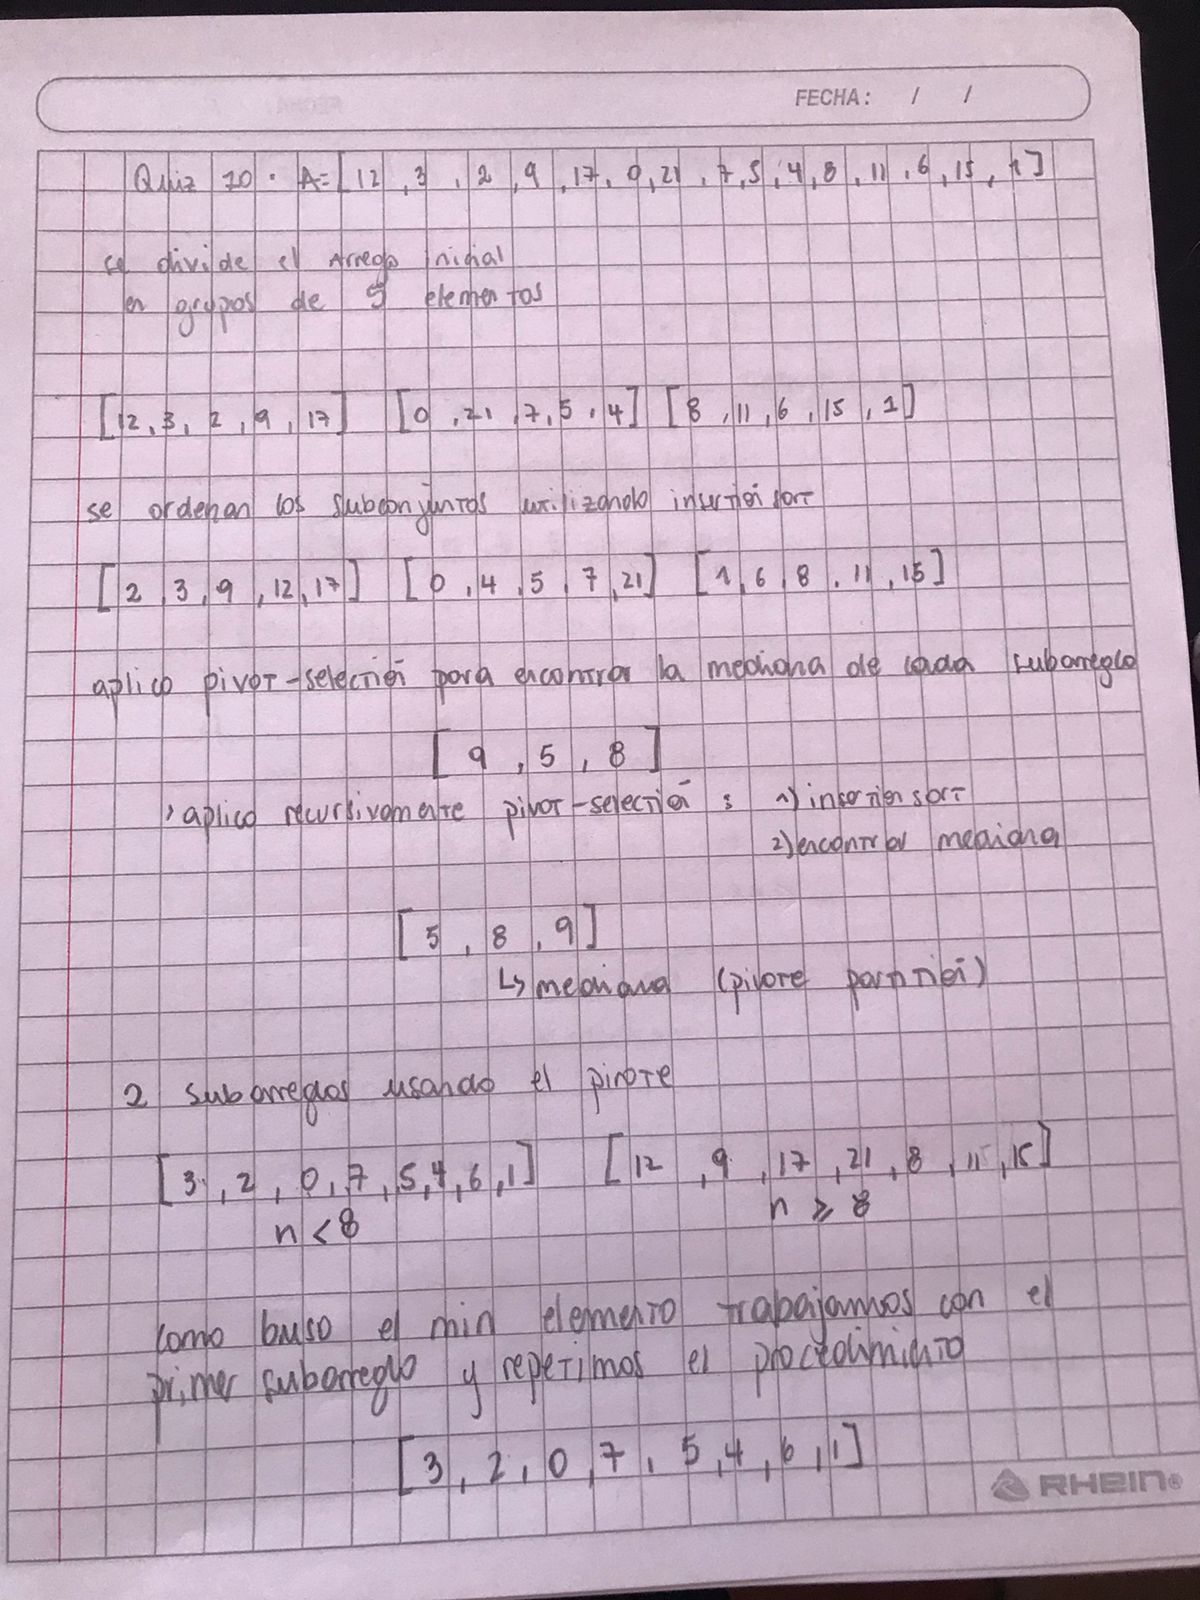


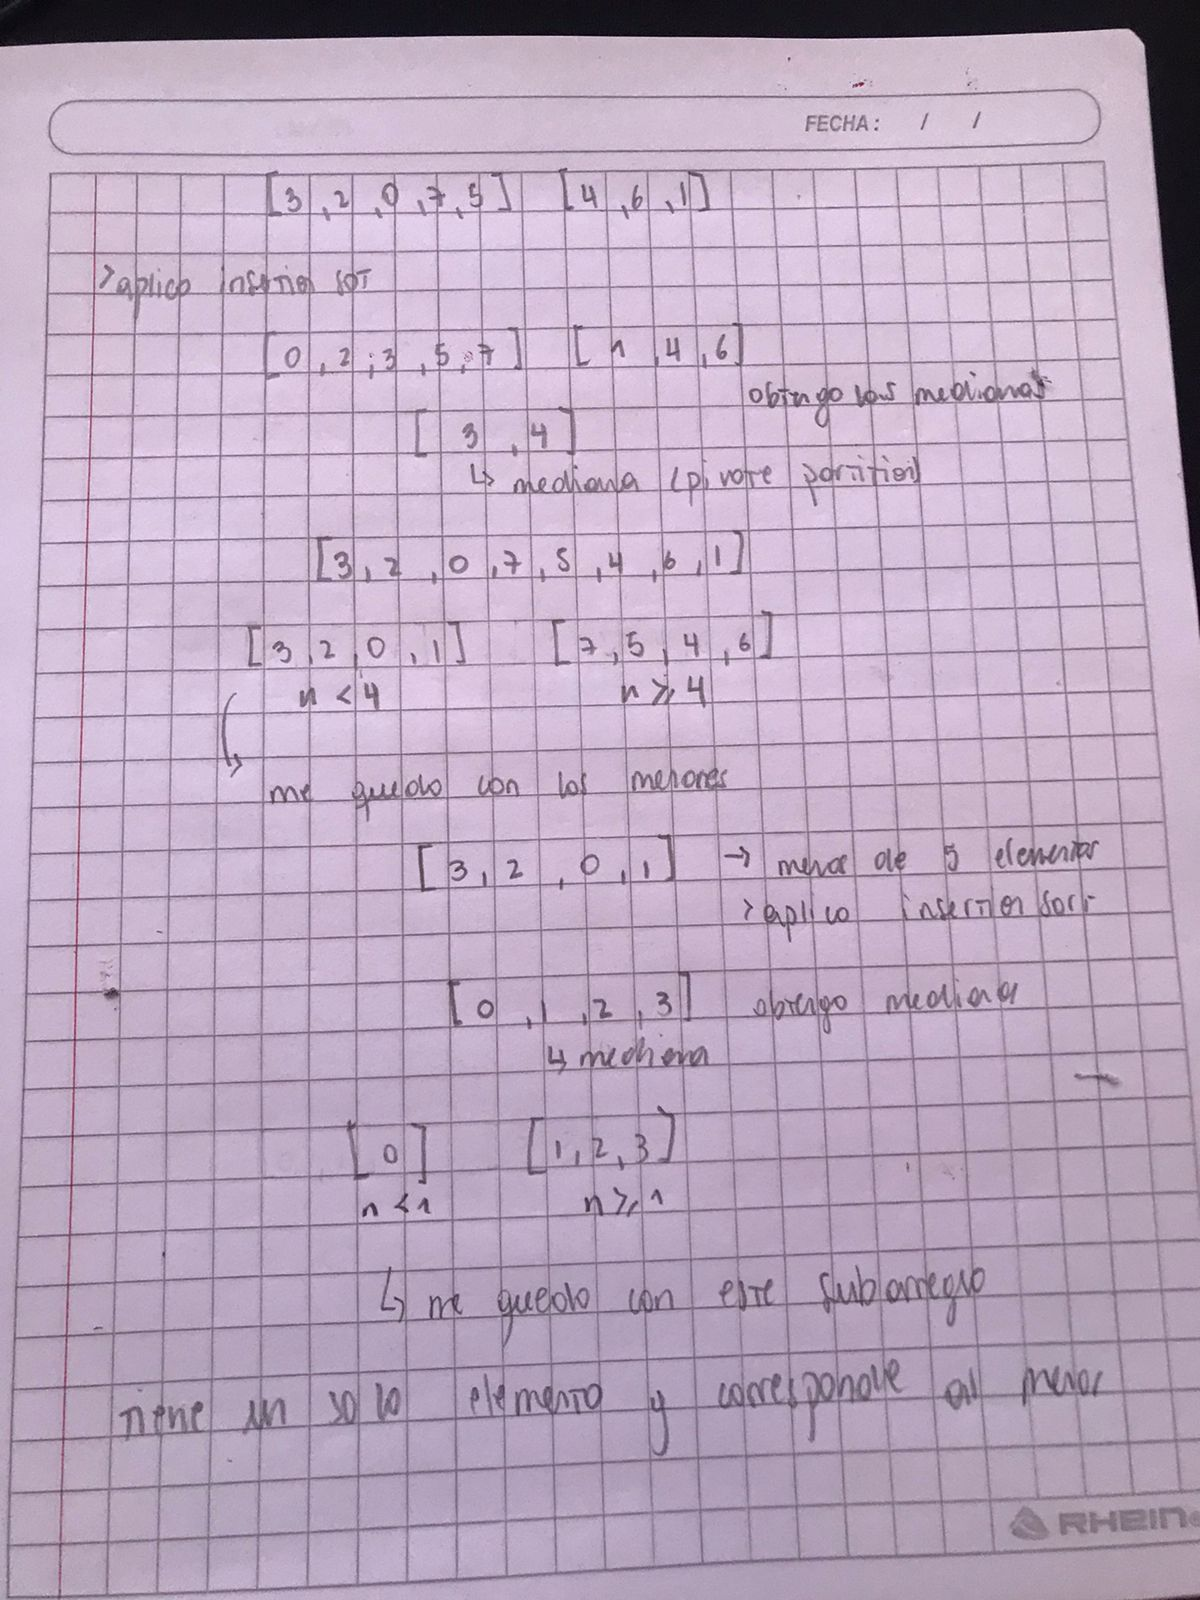

##**Implementación del algortimo**

###Insertion Sort

In [ ]:
import random
from termcolor import colored
import copy

def insertion_sort(arr,cont):
    n = len(arr)

    for i in range (1, len(arr)):
      aux = arr[i]
      k = i-1

      cont[0]= cont[0] +1
      while k >= 0 and aux < arr[k]:
            arr[k+1] = arr[k]
            k = k-1
            cont[0]=cont[0]+1
      arr[k+1] = aux

    return arr 


###PivotSelection (Encuentra la mediana)

In [ ]:
def pivotSelection(arr,cont,verbose):
  cont[0] += 1
  if (len(arr) == 1): #caso base
    return arr[0]


  if verbose == True:
    print("Arreglo: ",arr);
    print("\n")
  subarreglos = chunked(arr,5) #crea lossubarreglo con 5 elementos


  subArrOrdenados = [insertion_sort(chunk,cont) for chunk in subarreglos] #ordena los subarreglos con InsertionSort
  if verbose == True:
    print("Subarreglos Ordenados", subArrOrdenados)
    print("\n")
  arrMed = [] 

  for chunk in subArrOrdenados:   #calculo la mediana de cada uno de los subarreglo
    med = len(chunk)//2    
    arrMed.append(chunk[med])  #guardo las medianas en un arreglo

  return pivotSelection(arrMed,cont,verbose)  #llamo recursivamente para encontrar la mediana de medianas



In [ ]:

def chunked(l, chunk_size):

    return [l[i:i + chunk_size] for i in range(0, len(l), chunk_size)]

###**Funcion Partition**

In [ ]:
def partition(array, l, h,cont,mediana):  

    #Se inicializan variables
    comien = 0
    fin = len(array)-1
    piv = mediana
    
    cont[0] = cont[0] +1
    while comien < fin:
            
        
        #Busco algún número en el arreglo que sea menor al pivote
        while comien < h and array[comien] < piv:
            comien = comien + 1
            if comien < h:
              cont[0] = cont[0] +1

        #Busco algún número en el arreglo que sea mayor o igual al pivote
        while l < fin and array[fin] >= piv:
            cont[0] = cont[0] +1
            fin = fin - 1    
            if l < fin:
              cont[0] = cont[0] +1

        # Si fin y comien nunca se cruzaron intercambiaran posiciones 
        if comien < fin:
          array[comien], array[fin] = array[fin], array[comien]
          cont[0] = cont[0] + 1
        else:
          cont[0] = cont[0] + 1



    var = array.index(piv)

    if (array[comien] > piv): #si el número que se encuentra en la posición comien es mayor al pivote se intercambian
      cont[0] = cont[0] + 1
      array[comien], array[var] = array[var], array[comien]
    else:
      cont[0] = cont[0] + 1

    return comien



###**Función Select**

In [ ]:
def select(arr,com,fin,elem,cont,verbose):
  cont[0] +=1
  if len(arr) == 1:   #Caso base
    return arr[0]


  m = pivotSelection(arr,cont,verbose)   #Llamo a pivotSelection 
  if verbose ==True:
    print("Mediana del arreglo: ", m)
    print("\n")
  pivote= partition(arr,com,fin,cont,m)   #Llamo a partition entregandole la mediana como pivote
  if verbose ==True:
    print("Pivote del partition del arreglo: ", pivote)
    print("\n")

  if pivote == elem -1:   #Si el pivote retornado por partition es igual al elemento que busco, lo retorno
    return m;


  elif pivote > elem -1 :  #Si el pivote retornado por partition es mayor al elemento que busco, llamo recursivamente a select con el subarreglo izquierdo
    cont[0] = cont[0] +1
    return select(arr[:pivote],com,len(arr),elem ,cont,verbose)
  else:
    if pivote < elem -1:#Si el pivote retornado por partition es menor al elemento que busco, llamo recursivamente a select con el subarreglo derecho
      cont[0] = cont[0] +1
      return select(arr[pivote + 1:],com,len(arr),elem -pivote-1 ,cont,verbose)


arr = [12, 3, 2, 9, 17, 0, 21, 7, 5, 4, 8, 11, 6, 15, 1]
cont = [0,0]
print("El elemento buscado es:", select(arr,0,len(arr)-1,2,cont,verbose = False))
print("Cantidad de comparaciones", cont[0])

###**Opción verbose=True**

In [17]:
arr = [2,5,8,1,34,12]
cont = [0,0]
print("El elemento buscado es:", select(arr,0,len(arr)-1,2,cont,verbose = True))
print("Cantidad de comparaciones", cont[0])

Arreglo:  [2, 5, 8, 1, 34, 12]


Subarreglos Ordenados [[1, 2, 5, 8, 34], [12]]


Arreglo:  [5, 12]


Subarreglos Ordenados [[5, 12]]


Mediana del arreglo:  12


Pivote del partition del arreglo:  4


Arreglo:  [2, 5, 8, 1]


Subarreglos Ordenados [[1, 2, 5, 8]]


Mediana del arreglo:  5


Pivote del partition del arreglo:  2


Arreglo:  [2, 1]


Subarreglos Ordenados [[1, 2]]


Mediana del arreglo:  2


Pivote del partition del arreglo:  1


El elemento buscado es: 2
Cantidad de comparaciones 55


##**Propiedades del Algoritmo**

###**Correctitud del Algoritmo**

Para probar la correctitud del algoritmo select, usaremos inducción. Plantearemos un caso base y en base a este probaremos que se cumple la correctitud para todo el algoritmo.

**Asumiendo que partition, pivotSelection e insertionSort funcionan correctamente.**

**Caso base (El arreglo solo tiene un elemento)***

```
Para nuestro caso base, como nuestro arreglo solo tiene un elemento asumimos que trivialmente es el
iesimo menor número que estamos buscando.

```
**Caso 2 (El arreglo tiene 2 elementos)**

```
El arreglo entrará a pivotSelection, el cual generará un solo sub arreglo (dado que son menos de 5 
elementos), lo ordenara y retornara la mediana. Posteriormente partition usara la mediana como pivote 
y retornará dos subarreglos, con los elementos mayores al pivote y otro con los menores, dado que solo hay 
dos elementos quedaran dos subarreglos de 1 elemento. Dependiendo de si el elemento que buscamos es mayor
o menor al pivote que retorna partition, elegimos el subarreglo con el que trabajaremos y se llamará 
recursivamente a select con un subarreglo de 1 solo elemento, donde se cumplirá el caso base.
```

**Caso 3 (El arreglo tiene más de 2 elementos**)

```
Sabiendo que la función partition va a dividir en dossubarreglos y además  select es un algoritmo 
recursivo, entonces el algoritmo select trabajara con arreglos más pequeños hasta llegar al caso base.

En el caso de que el elemento k-ésimo sea menor a q(pivot), se trabajara con el arreglo derecho que se
peticionará y se escogerá nuevamente un pivot de la mediana de medianas que hará que se vuelva a dividir 
el arreglo en 2 hasta que se cumpla el caso base.

Es importante resaltar que el k-ésimo elemento no va a estar siempre al mismo lado del pivote en cada 
iteración, esto nos lleva a darnos cuenta de que el caso 3 y el caso 2 se complementan durante la 
ejecución del algoritmo select.

```

###**Tiempo de ejecución**
Para analizar el tiempo de ejecucion veremos la siguiente función recursiva.

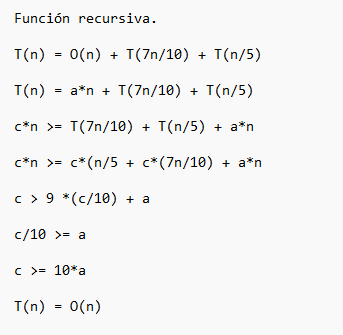

Encontrar la mediana de las medianas toma un tiempo de O(n), n (largo del arreglo), se divide en subarreglos de 5 elementos cada uno (n/5). Llamaremos LM al subarreglo que contiene las medianas, la mitad de los n/5 elementos en LM son menores a la mediana de LM ((n/5)/2  =  n/10). Por cada uno de los n/10 elementos, dos de ellos son menores a la mediana de medianas, lo que nos deja que 3n/10 son menores a la mediana de medianas. Si nos planteamos el peor caso, se llamaria recursivamente al subarreglo con 7n/10 elementos en cada llamada recursiva.

InsertionSort y encontrar la mediana de las medianas toma un tiempo de O(n).

Podemos ver que a traves de trabajo algebraico sobre la fórmula, obtenemos un tiempo de ejecución de O(n) tanto en su mejor como peor caso.


###**Experimentos**
Realizaremos una serie de experimentos con el algoritmo Select y RandomSelect, analizaremos los resultados y mostraremos conclusiones. Cantidad de comparaciones

A continuacion se muestran los gráficos en los cuales se realizaron las siguientes comparaciones.

**1. Número de comparaciones realizadas experimentalmente con el mejor y peor caso teóricos.**

**2. Comparar el algoritmo Select, con Randomized-Select (selección del pivote aleatoria.**


Todos los casos tiene arreglo de tamaño n ϵ [5,19], los arreglos de entrada son generados aleatoriamente en un rango de [1 , 100 ].

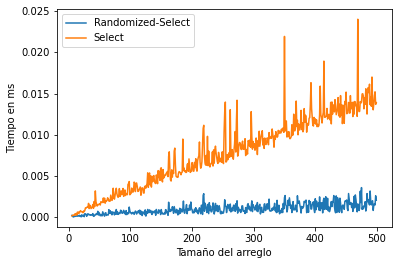

In [14]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import numpy as np

def Partition(a, p, r):

    x = a[r]
    i = p - 1
    for j in range(p, r):
        if a[j] <= x:
            i = i + 1
            
            a[i], a[j] = a[j], a[i]

    a[i+1], a[r] = a[r], a[i+1]

    return i + 1

def RandomizedPartition(a, p, r):
    
    i = np.random.randint(p, r)
    a[i], a[p] = a[p], a[i]
    return Partition(a, p, r)

def Randomizedselect(a, p, r, i):
    if p == r:
        return a[p]
    q = RandomizedPartition(a, p, r)
    
    k = q - p +1
    if i == k:
        return a[q]
    elif i < k:
        return Randomizedselect(a, p, q - 1, i)
    else:
        return Randomizedselect(a, q + 1, r, i - k)


x=[]; y=[]
y1=[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)
  cont = [0,0]
  verbose = False
  #la función repeat está ejecutando 20 veces insertion_Sort con el arreglo a y retorna el mejor tiepo obtenido.
  t1 = repeat(setup="from __main__ import Randomizedselect", stmt=f"Randomizedselect({a},{0},{n-1},{3})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import select", stmt=f"select({a},{0},{(len(a))},{3},{cont},{verbose})", repeat=1, number=10)
  x.append(n)
  y.append(t1)
  y1.append(t2)


plt.plot(x, y)
plt.plot(x, y1)
plt.legend(["Randomized-Select", "Select"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

####**Análisis Resultados**

Se realizó una comparacion entre el algoritmo **Select y Randomized-Select**, la principal diferencia entre estos recide en la **elección del pivote**, Select utiliza pivotSelection para obtener la mediana y así partition usara esta mediana como pivote los dos subarreglos que generará estarán mucho mejor balanceados; en cambio **Randomized-Select ocupa un pivote al azar** para partition, por ende se esperaría que no funcionará tan eficientemente. Podemos ver en el gráfico que sucede todo lo contrario **Randomized-select demora mucho menos que Select**, notamos que Randomized-select no supera los 0.005 ms aun cuando el tamaño del arreglo llega a los 500 elementos, por el contrario Select aumenta considerablemete a medida que crece el arreglo, alcanzando los 0.015 ms para los 500 elementos. 

Select al usar su mediana como pivote para partition, pensariamos que demoraria menos, ya que las particiones se reaizarian de forma más balanceada, pero como vimo no fue así. Esto se debe a todo el trabajo "extra" que realiza select, tiene que realizar la subdiviciones del arreglo principal y posteriormente ordenar cada uno de los subarreglos con InsertionSort, por ende concluimos que Randomized funciona más eficientemente en terminos de tiempo de ejecución.

In [ ]:
dsh

**Análisis Resultados**

Si analizamos el gráfico de arriba, podemos notar que **se realizan la misma cantidad de comparaciones en el mejor y peor caso**, confirmando lo planteado en la sección tiempo de ejecución, donde se explica que el tiempo de ejecución para el mejor y peor caso es el mismo. **La cantidad de comparaciones depende unicamente del largo del arreglo.**